<a href="https://colab.research.google.com/github/aipalak/ML-Basics/blob/main/Log_Regression_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [6]:
import os
os.environ["KAGGLE_USERNAME"]="palak27"
os.environ["KAGGLE_KEY"] = "a9c6366cd0407ac517d026e146957691"
!kaggle datasets download arviinndn/heart-disease-dataset-ucicsv

  0% 0.00/3.44k [00:00<?, ?B/s]
100% 3.44k/3.44k [00:00<00:00, 7.41MB/s]


In [7]:
from IPython.display import clear_output
!unzip heart-disease-dataset-ucicsv.zip
clear_output()

In [8]:
df=pd.read_csv('heart_disease_dataset_UCI.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
cols=df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

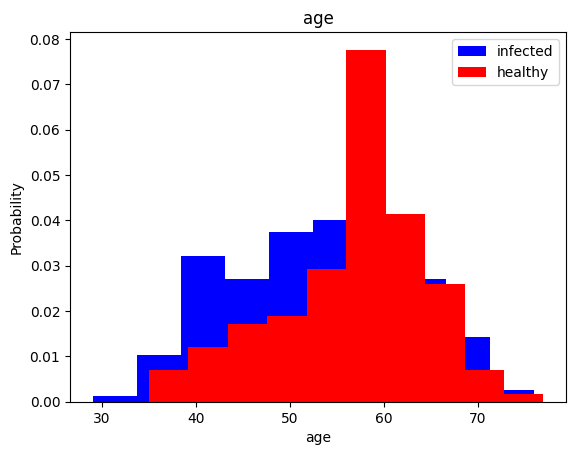

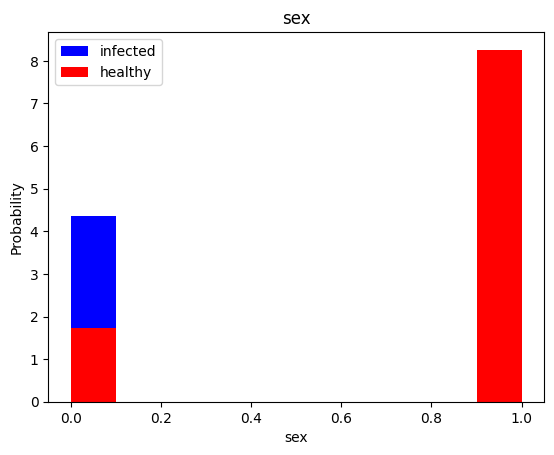

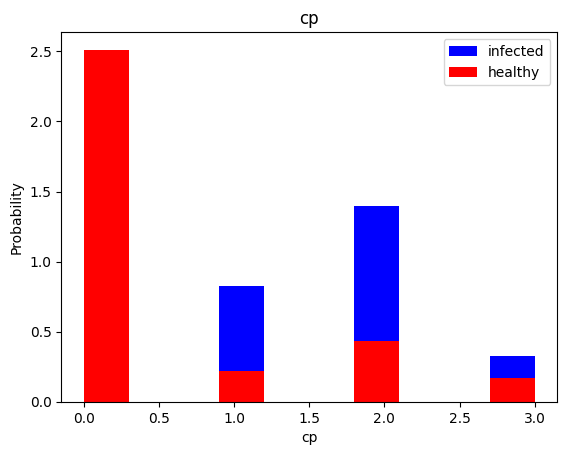

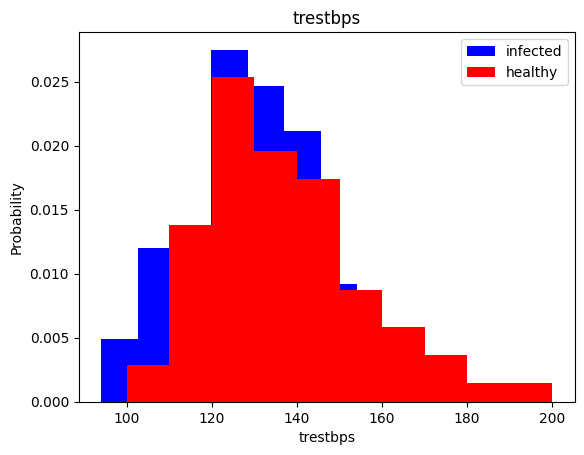

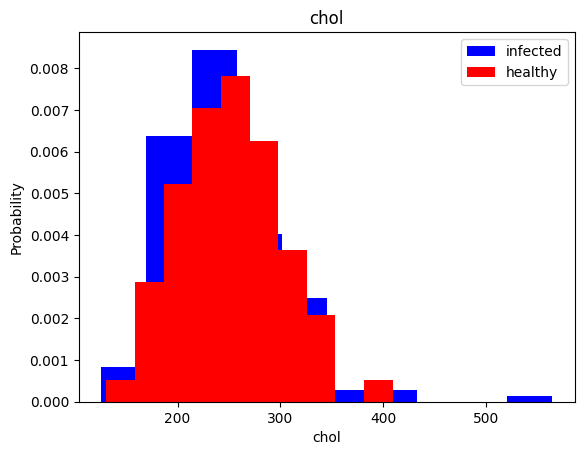

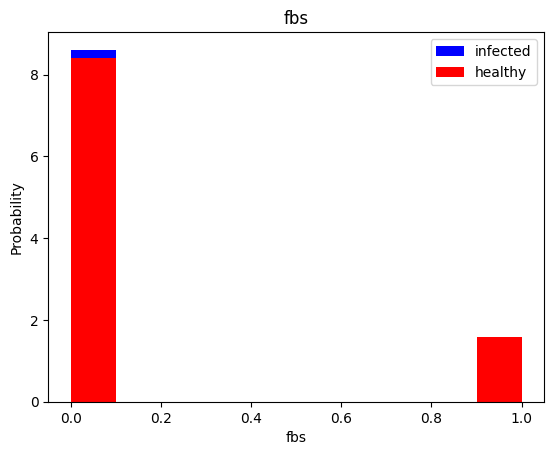

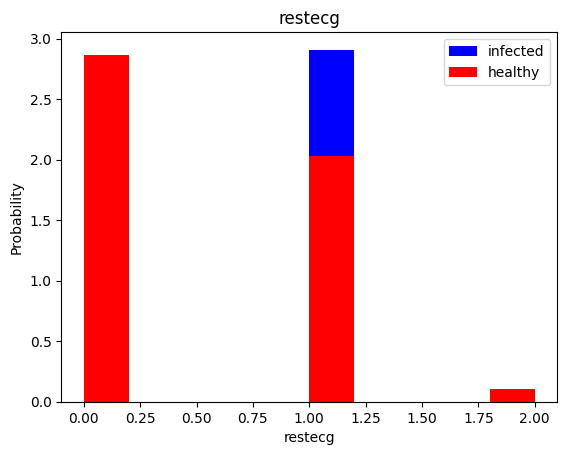

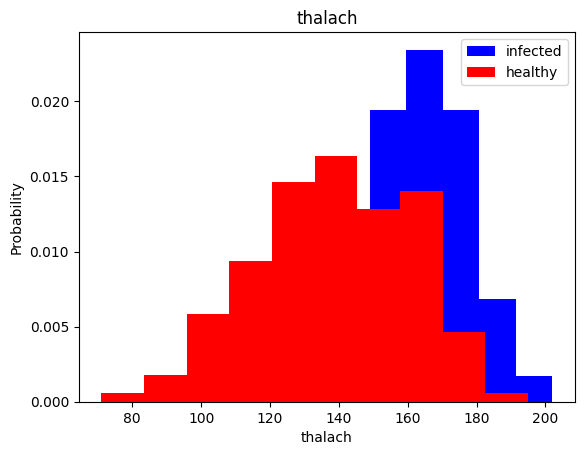

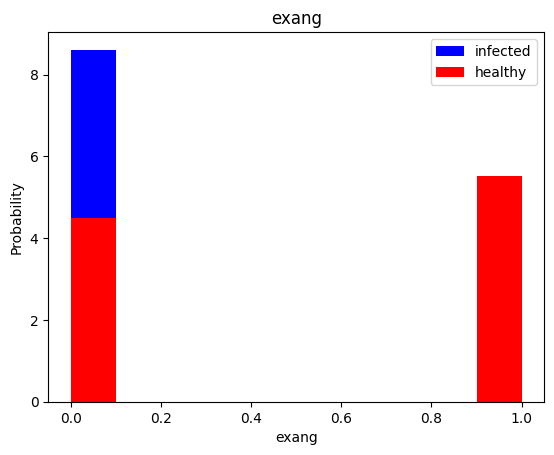

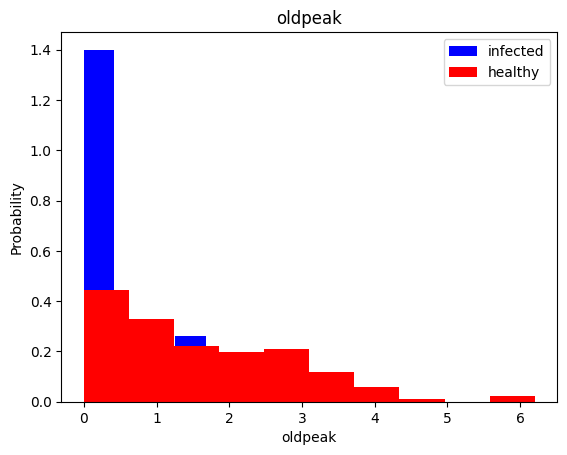

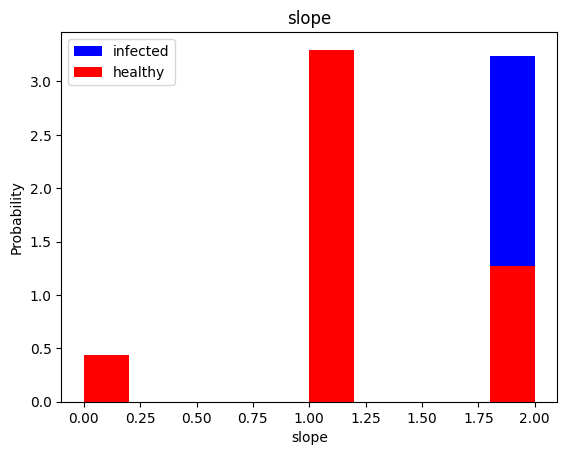

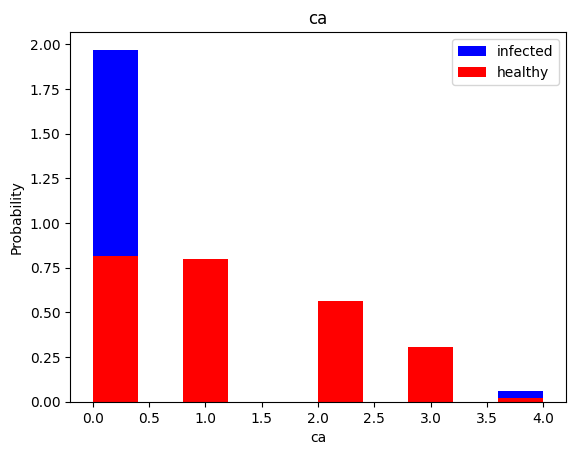

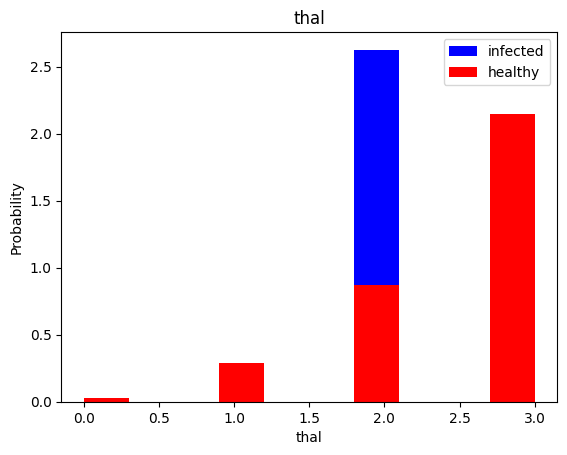

In [31]:

for label in cols[:-1]:
  plt.hist(df[df["target"]==1][label],color="blue",label="infected",density=True)
  plt.hist(df[df["target"]==0][label],color="red",label="healthy",density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

In [12]:
X=df.iloc[:,:13]
Y=df.iloc[:,13]

In [15]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,Y,test_size=0.25)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [24]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        35
           1       0.79      0.80      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76

